November: Part 3 - This notebook is a continuation of gyre_runs.ipynb and gyre_runs_mackenzie01. It uses the bathymetries and grid created in final_bathymetry.ipynb. The configuration used to produce these results is gyre_mackenzie02.

Changes since Part 2:
* matlab script has transposed lons and lats so it won't flip the dimensions
* masking land using [Nancy notebook](http://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/analysis-nancy/raw/tip/notebooks/Masking%20with%20tmask.ipynb)
* now, we have the realistic bathymetry
* inputting stratification into the model

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/modules/')
import functions_plot

from salishsea_tools import nc_tools
def plot_gyre_times(gridT, var, depth_ind, time_inds, cmin, cmax, cmaps, max_min):
    cmaps.set_bad('wheat')
    fig, ax = plt.subplots(1, len(time_inds), figsize=(20, 4), sharex=True, sharey=True)
    for i, n in zip(time_inds, np.arange(len(time_inds))):
        if max_min == True:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax) # depth = 135.84467 m
            if n == 0:
                cbar = fig.colorbar(c, ax=ax[0])
        elif max_min == False:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps)
            cbar = fig.colorbar(c, ax=ax[n])
        timestamp = nc_tools.timestamp(gridT,i).format('HH:mm (MM/DD)')
        ax[n].set_title(timestamp)
        ax[n].set_xlim(0,U.shape[3])
        ax[n].set_ylim(0,U.shape[2])
        ax[0].set_ylabel('depth = ' + str(int(gridT['deptht'][depth_ind])) + 'm', fontsize=16)
    return fig

## Summary


* cp_cfg
* bathy_meter.nc and coordinates.nc
* nn_bathy = 1 (0 for compute)
* jphgr_msh = 0 (5 for gyre)
* jperio = 1 (cyclic)
* ln_zco, ln_zps
* jpidta = jpiglo, jpjdta = jpjglo, jpkdta 


|Parameter      |Run01 (Id)|Run01 (Re)  |Run01 (Re)|
|---------------|----------|------------|----------|
|ln_bt_nn_auto  |False     |---         |True      |
|rn_bt_cmax     |NA        |---         |0.05      |
|rn_rdt         |20        |---         |10        |
|nn_baro        |4         |---         |NA        |
|calc nn_baro   |NA        |NA          |5         |
|nn_itend       |2160 (12h)|---         |---       |
|nn_write       |360 (2h)  |---         |---       |
|nn_tau000 [ts] |540 (3h)  |-,10        |540       |
|rn_utau0 [N/m2]|5.0       |-,0.5,0.1,0 |5.0       |
|rn_vtau0 [N/m2]|5.0       |-,0.5,0.1,0 |5.0       |
|status         | ✓ (2160) | 18 (361-)  |  (2160)  |

* under these nn_itend and nn_write, the stages where the code can fail are [1, 361, 721, 1081, 1441, 1801]
* from Part 2, remember you have to reduce timestep and then consider the wind forcing

In [2]:
# calculate nn_baro using rn_rdt and cmax
g = 9.81; cmax = 0.05; dx = 4501; H = 1300; dt_clinic = 10 #(rn_rdt)
u = np.sqrt(g * H)
dt_tropic = (cmax * dx) / u
iterations = dt_clinic / dt_tropic
iterations

5.0179596244528888

# Idealized vs Realistic: Run 01 - Test

This run uses the configuration that I know already works from gyre_runs_mackenzie01.ipynb. This uses the idealized bathymetry with size 117x87.

In [2]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run01'
gridT_I, lon_I, lat_I, tem_I, sal_I, ssh_I, U_I, V_I, W_I = functions_plot.load_model_output(path, cfg)

In [3]:
tem_I.shape

(12, 20, 87, 117)

In [4]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run01'
gridT_R, lon_R, lat_R, tem_R, sal_R, ssh_R, U_R, V_R, W_R = functions_plot.load_model_output(path, cfg)

In [5]:
tem_R.shape

(6, 20, 87, 117)

### U Velocity

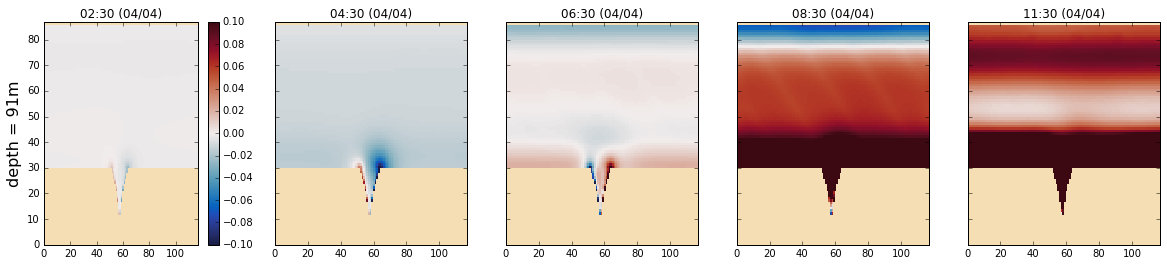

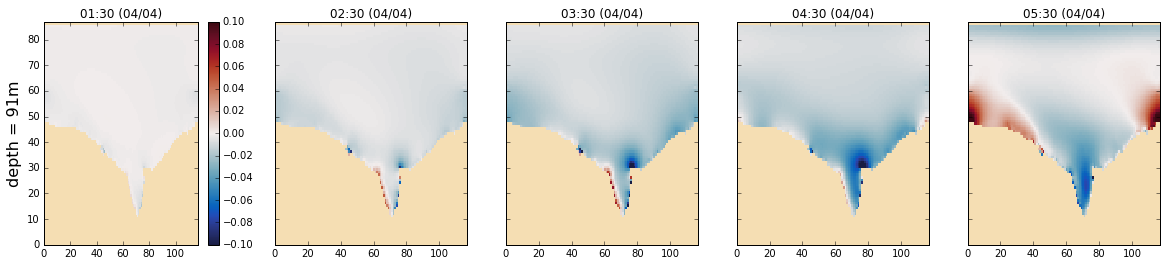

In [75]:
fig_shal = plot_gyre_times(gridT_I, U_I, 7, [2,4,6,8,11], -0.1, 0.1, cmo.cm.balance, True)
fig_shal = plot_gyre_times(gridT_R, U_R, 7, [1,2,3,4,5], -0.1, 0.1, cmo.cm.balance, True)

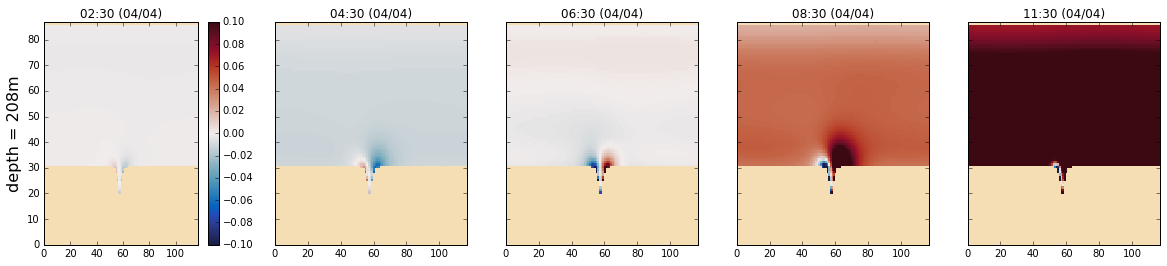

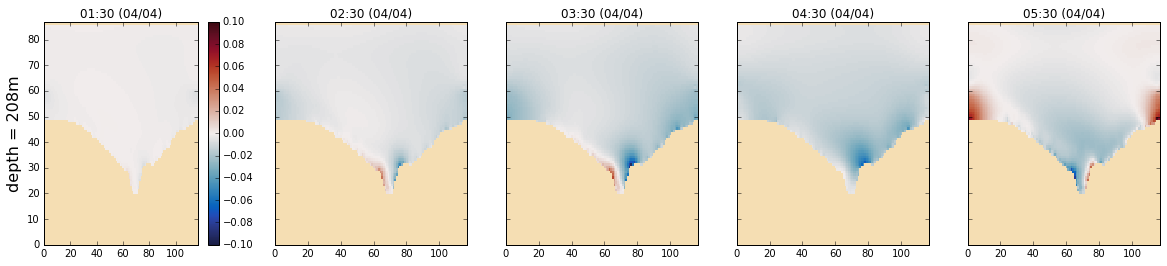

In [68]:
fig_deep = plot_gyre_times(gridT_I, U_I, 11, [2,4,6,8,11], -0.1, 0.1, cmo.cm.balance, True)
fig_deep = plot_gyre_times(gridT_R, U_R, 11, [1,2,3,4,5], -0.1, 0.1, cmo.cm.balance, True)

### V Velocity

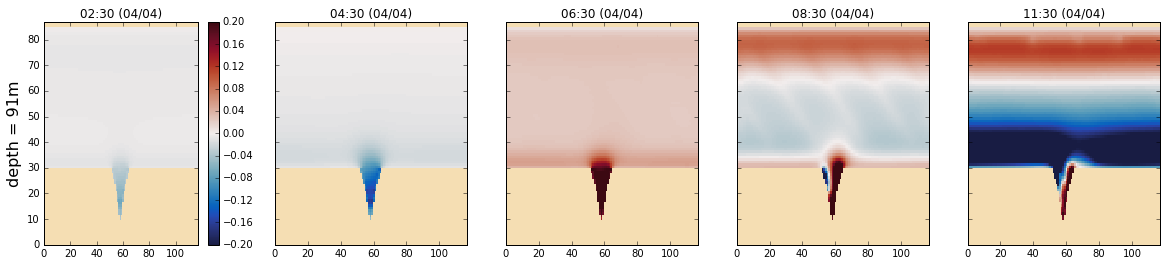

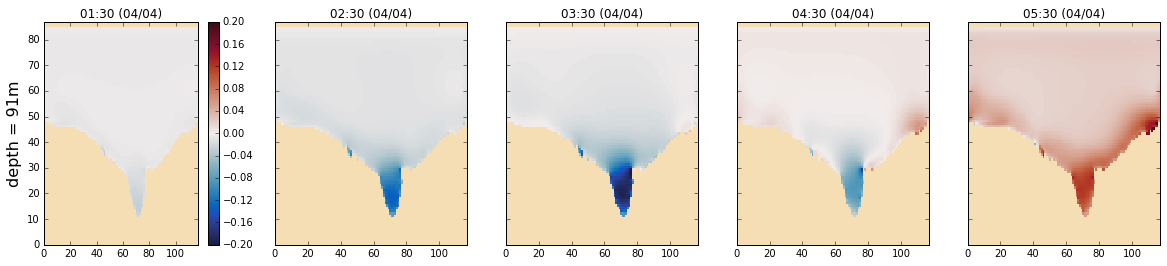

In [69]:
fig_shal = plot_gyre_times(gridT_I, V_I, 7, [2,4,6,8,11], -0.2, 0.2, cmo.cm.balance, True)
fig_shal = plot_gyre_times(gridT_R, V_R, 7, [1,2,3,4,5], -0.2, 0.2, cmo.cm.balance, True)

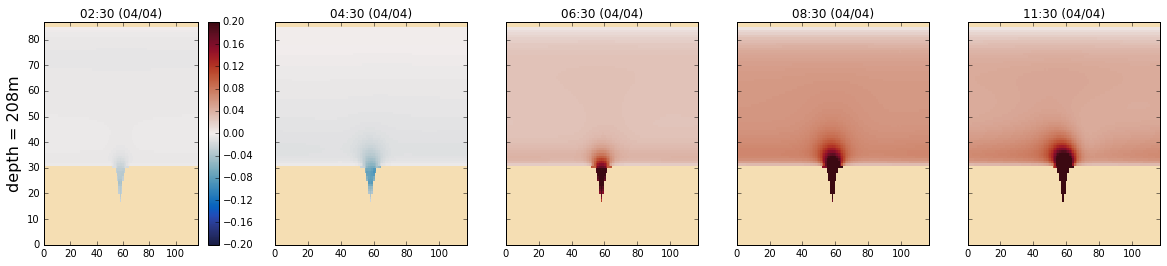

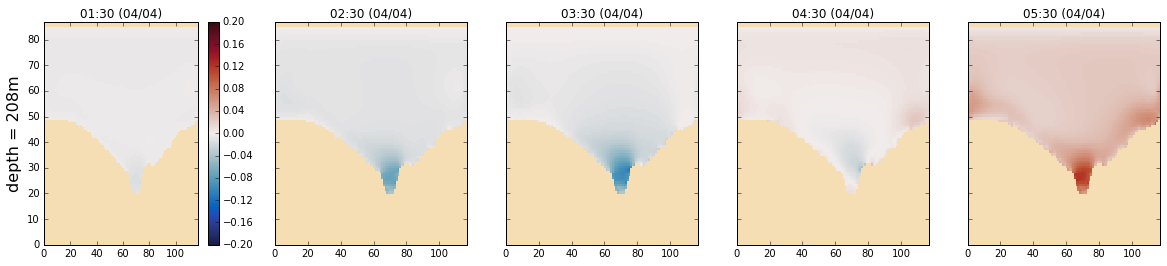

In [70]:
fig_deep = plot_gyre_times(gridT_I, V_I, 11, [2,4,6,8,11], -0.2, 0.2, cmo.cm.balance, True)
fig_deep = plot_gyre_times(gridT_R, V_R, 11, [1,2,3,4,5], -0.2, 0.2, cmo.cm.balance, True)

### W velocity

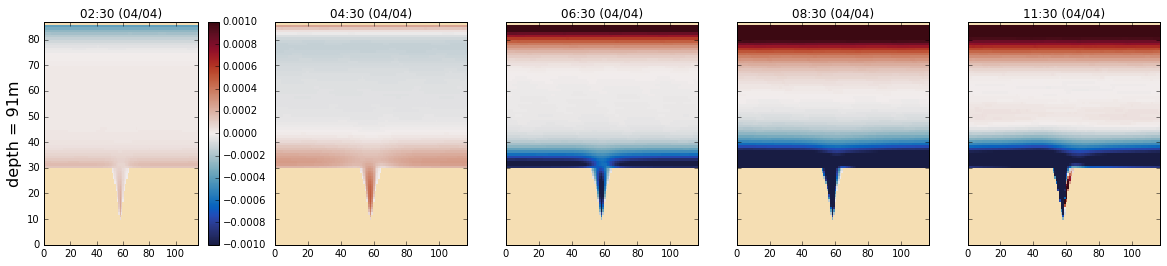

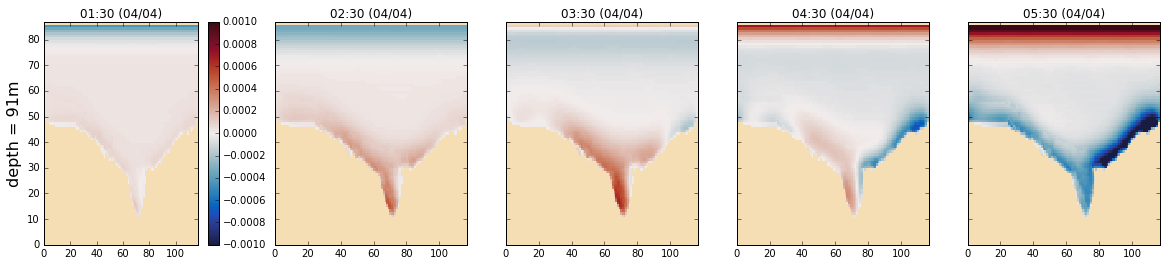

In [71]:
fig_shal = plot_gyre_times(gridT_I, W_I, 7, [2,4,6,8,11], -0.001, 0.001, cmo.cm.balance, True)
fig_shal = plot_gyre_times(gridT_R, W_R, 7, [1,2,3,4,5], -0.001, 0.001, cmo.cm.balance, True)

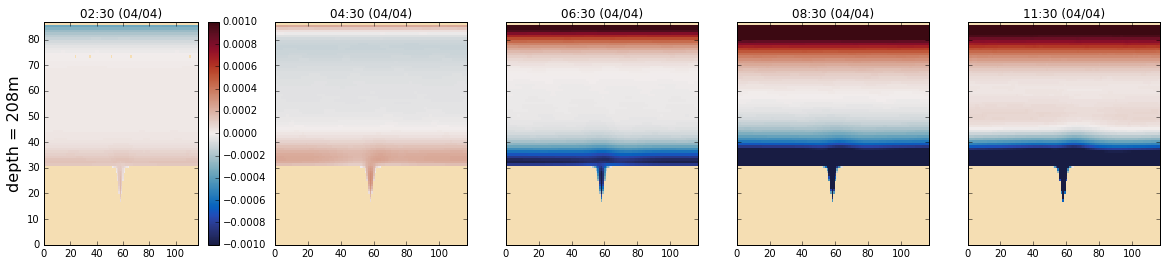

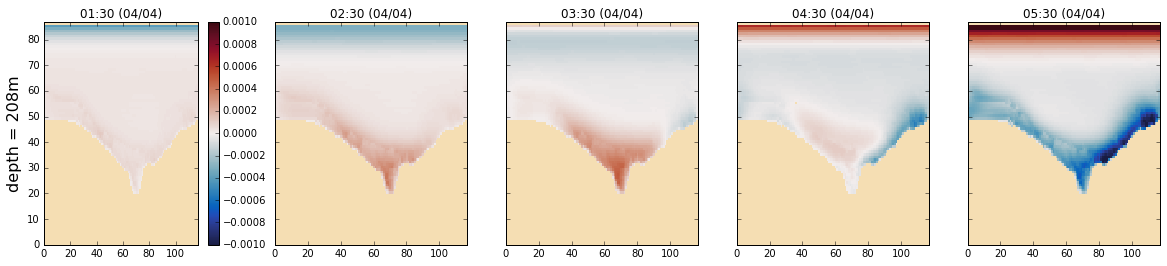

In [72]:
fig_deep = plot_gyre_times(gridT_I, W_I, 11, [2,4,6,8,11], -0.001, 0.001, cmo.cm.balance, True)
fig_deep = plot_gyre_times(gridT_R, W_R, 11, [1,2,3,4,5], -0.001, 0.001, cmo.cm.balance, True)